# Main Results – Decision Trees and Random Forests

This notebook presents the main experimental results of the project.
It answers Questions 2 to 10 of the assignment, using two datasets:

- Differentiated Thyroid Cancer Recurrence
- Palmer Penguins

All experiments are reproducible by running the cells in order.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
import os, sys
sys.path.append(os.path.abspath(".."))


In [2]:
from src.preprocessing import (
    load_penguins_data,
    load_thyroid_data,
    encode_categorical_features,
    train_test_split_stratified
)

In [3]:
# Penguins
X_p, y_p = load_penguins_data()
X_p = encode_categorical_features(X_p)
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split_stratified(X_p, y_p)

# Thyroid
X_t, y_t = load_thyroid_data()
X_t = encode_categorical_features(X_t)
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split_stratified(X_t, y_t)


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
import sys
from pathlib import Path

PROJECT_ROOT = Path("..").resolve()
sys.path.append(str(PROJECT_ROOT))


In [6]:
from src.preprocessing import (
    load_thyroid_data,
    load_penguins_data,
    encode_categorical_features,
    train_test_split_stratified
)

from src.models import (
    id3_train,
    id3_predict,
    train_random_forest_feature_bagging,
    predict_random_forest_feature_bagging
)

from src.experiments import (
    training_size_experiment,
    feature_noise_experiment,
    label_noise_experiment,
    pruning_experiment,
    rf_cv_experiment
)

from src.Metrics import compute_metrics


## Dataset 1 : Theyroid Cancer 

In [7]:
X_t, y_t = load_thyroid_data()
X_t = encode_categorical_features(X_t)

Xtr_t, Xte_t, ytr_t, yte_t = train_test_split_stratified(X_t, y_t)

Xtr_t.shape, Xte_t.shape


((306, 16), (77, 16))

In [8]:
tree_t = id3_train(Xtr_t, ytr_t)
y_pred_t = id3_predict(tree_t, Xte_t)

compute_metrics(yte_t, y_pred_t, pos="Yes")


(np.float64(0.948051948051948),
 np.float64(0.95),
 np.float64(0.8636363636363636),
 np.float64(0.9047619047619048))

In [9]:
train_fracs = [0.1, 0.2, 0.4, 0.6, 0.8, 1.0]

df_q6a_t = training_size_experiment(
    Xtr_t, ytr_t,
    Xte_t, yte_t,
    train_fracs
)

df_q6a_t


,Train fraction,F1 mean,F1 std
0,0.1,0.822440,0.015365
1,0.2,0.865906,0.033206
2,0.4,0.879310,0.044818
3,0.6,0.869597,0.027454
4,0.8,0.882530,0.033180
5,1.0,0.904762,0.000000


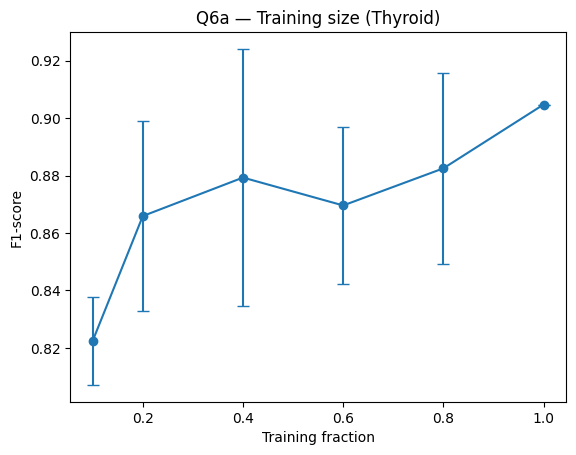

In [10]:
plt.errorbar(
    df_q6a_t["Train fraction"],
    df_q6a_t["F1 mean"],
    yerr=df_q6a_t["F1 std"],
    marker="o",
    capsize=4
)
plt.xlabel("Training fraction")
plt.ylabel("F1-score")
plt.title("Q6a — Training size (Thyroid)")
plt.show()


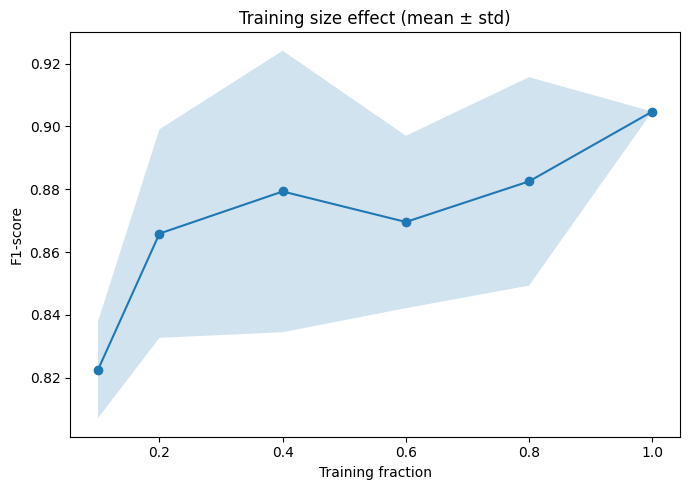

In [11]:
import numpy as np
import matplotlib.pyplot as plt

x = df_q6a_t["Train fraction"].to_numpy()
y = df_q6a_t["F1 mean"].to_numpy()
s = df_q6a_t["F1 std"].to_numpy()   # or "F1 std" column name

plt.figure(figsize=(7,5))
plt.plot(x, y, marker="o")
plt.fill_between(x, y - s, y + s, alpha=0.2)
plt.xlabel("Training fraction")
plt.ylabel("F1-score")
plt.title("Training size effect (mean ± std)")
plt.tight_layout()
plt.show()


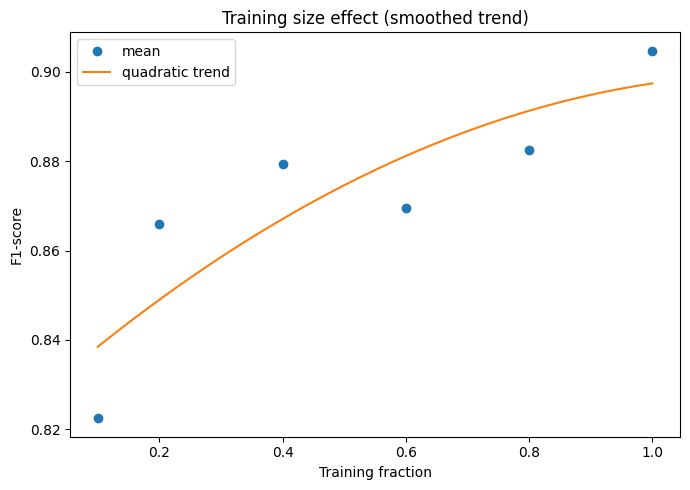

In [12]:
import numpy as np
import matplotlib.pyplot as plt

x = df_q6a_t["Train fraction"].to_numpy()
y = df_q6a_t["F1 mean"].to_numpy()

coef = np.polyfit(x, y, deg=2)
xx = np.linspace(x.min(), x.max(), 200)
yy = np.polyval(coef, xx)

plt.figure(figsize=(7,5))
plt.plot(x, y, "o", label="mean")
plt.plot(xx, yy, label="quadratic trend")
plt.xlabel("Training fraction")
plt.ylabel("F1-score")
plt.title("Training size effect (smoothed trend)")
plt.legend()
plt.tight_layout()
plt.show()


## Feature Noise : question 6b

In [ ]:
noise_levels = [0.0, 0.05, 0.1, 0.2, 0.3]

df_q6b_t = feature_noise_experiment(
    Xtr_t, ytr_t,
    Xte_t, yte_t,
    noise_levels
)

df_q6b_t


,Noise level,F1 mean,F1 std
0,0.00,0.904762,0.000000
1,0.05,0.922495,0.030184
2,0.10,0.922495,0.030184
3,0.20,0.909190,0.016340
4,0.30,0.907444,0.030597


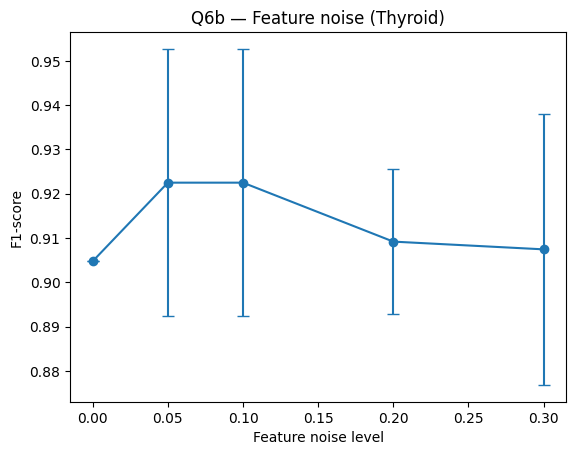

In [ ]:
plt.errorbar(
    df_q6b_t["Noise level"],
    df_q6b_t["F1 mean"],
    yerr=df_q6b_t["F1 std"],
    marker="o",
    capsize=4
)
plt.xlabel("Feature noise level")
plt.ylabel("F1-score")
plt.title("Q6b — Feature noise (Thyroid)")
plt.show()


## label noise 

In [ ]:
df_q6c_t = label_noise_experiment(
    Xtr_t, ytr_t,
    Xte_t, yte_t,
    noise_levels
)
df_q6c_t

,Label noise level,F1 mean,F1 std
0,0.00,0.904762,0.000000
1,0.05,0.826227,0.047485
2,0.10,0.737961,0.071608
3,0.20,0.579453,0.036412
4,0.30,0.529216,0.107284


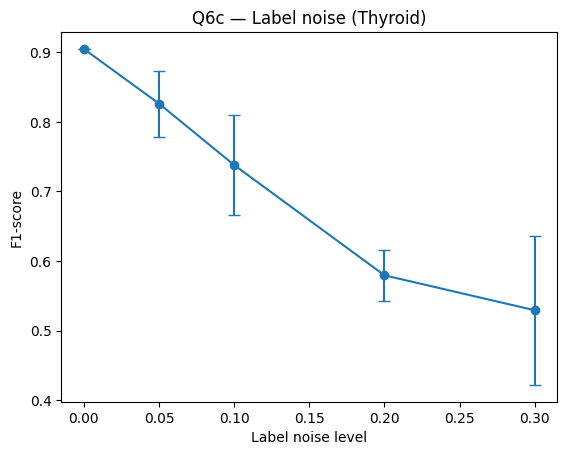

In [ ]:
plt.errorbar(
    df_q6c_t["Label noise level"],
    df_q6c_t["F1 mean"],
    yerr=df_q6c_t["F1 std"],
    marker="o",
    capsize=4
)
plt.xlabel("Label noise level")
plt.ylabel("F1-score")
plt.title("Q6c — Label noise (Thyroid)")
plt.show()


In [ ]:
depths = [1, 2, 3, 5, 8, None]

df_q6d_t = pruning_experiment(
    Xtr_t, ytr_t,
    Xte_t, yte_t,
    depths
)

df_q6d_t


,Max depth,Accuracy,Precision,Recall,F1-score
0,1.0,0.935065,1.00,0.772727,0.871795
1,2.0,0.935065,1.00,0.772727,0.871795
2,3.0,0.961039,1.00,0.863636,0.926829
3,5.0,0.948052,0.95,0.863636,0.904762
4,8.0,0.948052,0.95,0.863636,0.904762
5,NaN,0.948052,0.95,0.863636,0.904762


## Palmer penguins

In [ ]:
X_p, y_p = load_penguins_data()
X_p = encode_categorical_features(X_p)

Xtr_p, Xte_p, ytr_p, yte_p = train_test_split_stratified(X_p, y_p)
Xtr_p.shape, Xte_p.shape

((266, 8), (67, 8))

In [ ]:
tree_p = id3_train(Xtr_p, ytr_p)
y_pred_p = id3_predict(tree_p, Xte_p)

compute_metrics(yte_p, y_pred_p)

(np.float64(0.9850746268656716),
 0.9888888888888889,
 0.9861111111111112,
 0.9872580839043154)

In [ ]:
df_q6a_p = training_size_experiment(
    Xtr_p, ytr_p,
    Xte_p, yte_p,
    train_fracs
)

df_q6a_p

,Train fraction,F1 mean,F1 std
0,0.1,0.970964,8.469441e-03
1,0.2,0.979748,1.452612e-02
2,0.4,0.984662,9.586548e-03
3,0.6,0.987258,1.110223e-16
4,0.8,0.992355,6.242239e-03
5,1.0,0.987258,1.110223e-16


In [ ]:
df_q6b_p = feature_noise_experiment(
    Xtr_p, ytr_p,
    Xte_p, yte_p,
    noise_levels
)

df_q6b_p

,Noise level,F1 mean,F1 std
0,0.00,0.987258,1.110223e-16
1,0.05,0.988886,5.835441e-03
2,0.10,0.992393,1.014918e-02
3,0.20,0.992565,9.105464e-03
4,0.30,0.985131,7.434581e-03


In [ ]:
df_q6d_p = pruning_experiment(
    Xtr_p, ytr_p,
    Xte_p, yte_p,
    depths
)
df_q6d_p

,Max depth,Accuracy,Precision,Recall,F1-score
0,1.0,0.776119,0.529429,0.652778,0.579050
1,2.0,0.985075,0.988889,0.986111,0.987258
2,3.0,0.985075,0.988889,0.986111,0.987258
3,5.0,0.985075,0.988889,0.986111,0.987258
4,8.0,0.985075,0.988889,0.986111,0.987258
5,NaN,0.985075,0.988889,0.986111,0.987258


## Random Forest 

In [ ]:
param_grid = {
    "n_trees": [20, 50, 100],
    "max_depth": [None, 3, 5],
    "max_features": [None, "sqrt"]
}

df_rf_cv = rf_cv_experiment(
    Xtr_t, ytr_t,
    param_grid
)

df_rf_cv.sort_values("F1 mean", ascending=False).head()


,n_trees,max_depth,max_features,F1 mean,F1 std
2,20,3.0,None,0.859011,0.032156
3,20,3.0,sqrt,0.859011,0.032156
12,100,NaN,None,0.851818,0.039268
13,100,NaN,sqrt,0.851818,0.039268
9,50,3.0,sqrt,0.849924,0.020552


In [ ]:
def plot_pruning_barplot(df_q6d, title):
    # Convert max_depth to string labels (None → "None")
    x_labels = df_q6d["Max depth"].apply(
        lambda d: "None" if d is None else str(d)
    )

    f1_scores = df_q6d["F1-score"].values
    x_pos = np.arange(len(x_labels))

    plt.figure(figsize=(7, 4))
    plt.bar(x_pos, f1_scores)

    plt.xticks(x_pos, x_labels)
    plt.xlabel("Maximum tree depth")
    plt.ylabel("F1-score")
    plt.title(title)

    # Show values on top of bars
    for i, v in enumerate(f1_scores):
        plt.text(i, v + 0.01, f"{v:.3f}", ha="center", va="bottom")

    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()

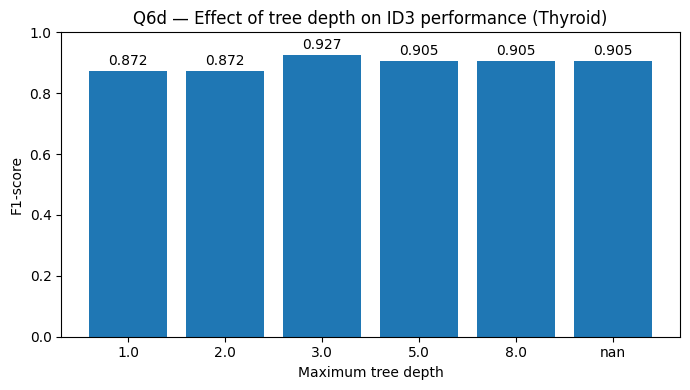

In [ ]:
plot_pruning_barplot(
    df_q6d_t,
    title="Q6d — Effect of tree depth on ID3 performance (Thyroid)"
)

In [ ]:
# Q5 — Model comparison (Thyroid)
results_q5_t = []

# ID3
tree_t = id3_train(Xtr_t, ytr_t)
y_pred_id3_t = id3_predict(tree_t, Xte_t)

acc, prec, rec, f1 = compute_metrics(yte_t, y_pred_id3_t, pos="Yes")
results_q5_t.append(("ID3", acc, prec, rec, f1))


# Random Forest (Bagging via feature bagging with all features) 
forest_rf_t = train_random_forest_feature_bagging(
    Xtr_t, ytr_t,
    n_trees=50,
    max_depth=None,
    max_features=None
)

y_pred_rf_t = predict_random_forest_feature_bagging(
    forest_rf_t, Xte_t
)

acc, prec, rec, f1 = compute_metrics(yte_t, y_pred_rf_t, pos="Yes")
results_q5_t.append(("Random Forest", acc, prec, rec, f1))


# ----- Comparison table -----
comparison_table_t = pd.DataFrame(
    results_q5_t,
    columns=["Model", "Accuracy", "Precision", "Recall", "F1-score"]
)

comparison_table_t


,Model,Accuracy,Precision,Recall,F1-score
0,ID3,0.948052,0.95,0.863636,0.904762
1,Random Forest,0.922078,0.90,0.818182,0.857143


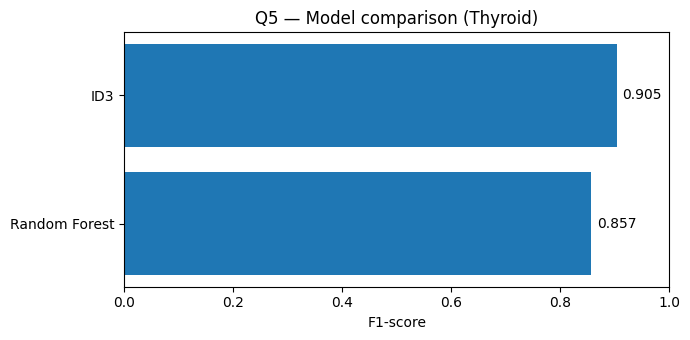

In [ ]:
plot_df = comparison_table_t.sort_values("F1-score", ascending=True)

plt.figure(figsize=(7, 3.5))
plt.barh(plot_df["Model"], plot_df["F1-score"])

plt.xlabel("F1-score")
plt.title("Q5 — Model comparison (Thyroid)")

for i, v in enumerate(plot_df["F1-score"]):
    plt.text(v + 0.01, i, f"{v:.3f}", va="center")

plt.xlim(0, 1)
plt.tight_layout()
plt.show()
